In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier

In [46]:
l=pd.read_csv("Breast_Cancer.csv")
l.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [47]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [48]:
def check(l):
     o=[]
     col = a.columns
     for c in col:
        dt = l[c].dtypes
        null = l[c].isnull().sum()
        nunique= l[c].nunique()
        o.append([c,dt,null,nunique])
     df = pd.DataFrame(o)
     df.columns=["colums","dtypes","null values","unique values"]
     return(df)

In [49]:
check(a)

,colums,dtypes,null values,unique values
0,Age,int64,0,40
1,Race,object,0,3
2,Marital Status,object,0,5
3,T Stage,object,0,4
4,N Stage,object,0,3
5,6th Stage,object,0,5
6,differentiate,object,0,4
7,Grade,object,0,4
8,A Stage,object,0,2
9,Tumor Size,int64,0,110


In [50]:

import plotly.express as px

def gra(l,j):
   img= px.histogram(a,x=j,template="plotly_dark",color=j)
   img.show()

In [51]:
for i in l.columns:
    gra(l,i)

In [52]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
c=l.copy()
for i in c.columns:
    c[i]=lab.fit_transform(c[i])
c

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,38,2,1,0,0,0,1,3,1,3,1,1,23,0,59,0
1,20,2,1,1,1,2,0,2,1,34,1,1,13,4,61,0
2,28,2,0,2,2,4,0,2,1,62,1,1,13,6,74,0
3,28,2,1,0,0,0,1,3,1,17,1,1,1,0,83,0
4,17,2,1,1,0,1,1,3,1,40,1,1,2,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,32,1,1,0,0,0,0,2,1,8,1,1,0,0,48,0
4020,26,2,0,1,1,2,0,2,1,45,1,1,13,7,68,0
4021,38,2,1,1,0,1,0,2,1,21,1,0,10,2,68,0
4022,28,0,0,1,0,1,0,2,1,43,1,1,10,0,71,0


In [53]:
c.describe()
c.info()
check(c)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int32
 2   Marital Status          4024 non-null   int32
 3   T Stage                 4024 non-null   int32
 4   N Stage                 4024 non-null   int32
 5   6th Stage               4024 non-null   int32
 6   differentiate           4024 non-null   int32
 7   Grade                   4024 non-null   int32
 8   A Stage                 4024 non-null   int32
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int32
 11  Progesterone Status     4024 non-null   int32
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

,colums,dtypes,null values,unique values
0,Age,int64,0,40
1,Race,int32,0,3
2,Marital Status,int32,0,5
3,T Stage,int32,0,4
4,N Stage,int32,0,3
5,6th Stage,int32,0,5
6,differentiate,int32,0,4
7,Grade,int32,0,4
8,A Stage,int32,0,2
9,Tumor Size,int64,0,110


<AxesSubplot:>

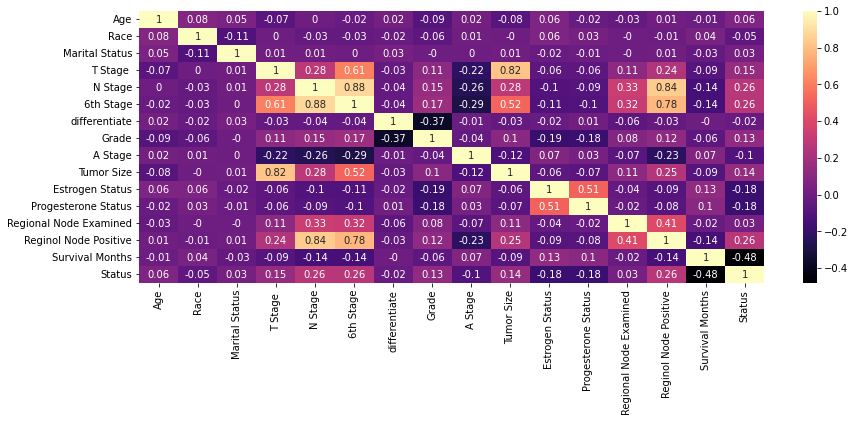

In [54]:
import seaborn as sns
corri = c.corr().round(2)
plt.figure(figsize=(14,5))
sns.heatmap(corri,annot=True,cmap="magma")

In [55]:
d=c.copy()
y=d.pop("Status").values
x=d.values

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [57]:
X_train.shape[0]!=Y_train.shape[0]

False

In [58]:
rr =RandomForestClassifier(n_estimators=660)
rr.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=660)

In [59]:
ypre=rr.predict(X_test)

In [60]:
accuracy_score(Y_test,ypre)

0.9255583126550868

In [61]:
graph = px.imshow(np.around(confusion_matrix(Y_test,ypre,normalize='true'),5),
text_auto=True,template="plotly_dark",
labels=dict(x="Predicted value",y="Correct value",color="Value"))
graph.show()